In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("weatherAUS.csv")
print(df.columns[df.isna().any()].tolist())

#print df.iat[3,6] == df.iat[5953,6]
#print pd.isnull(df["Evaporation"][5955:5960]).all()
for item in list(df.columns.values):
    na_len = df[item].isna().sum()
    total_len = df[item].count()
    
    if na_len > 0.7*total_len:
        del df[item]


columns = list(df.columns.values)
col = 0

df.loc[df.index.dropna()]

for index,row in df.iterrows():
    removed = False
    col = 0
    while col < len(columns) and removed == False:
        if row[columns[col]] != row[columns[col]]:
            df.drop(index, inplace=True)
            removed = True
        col = col+1

df.to_csv("ausweather_preprocessed.csv", sep='\t', encoding='utf-8')

 


            
    

 



#print(df[df["Evaporation"] == df["Evaporation"]])
    

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


/home/anirudh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/anirudh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


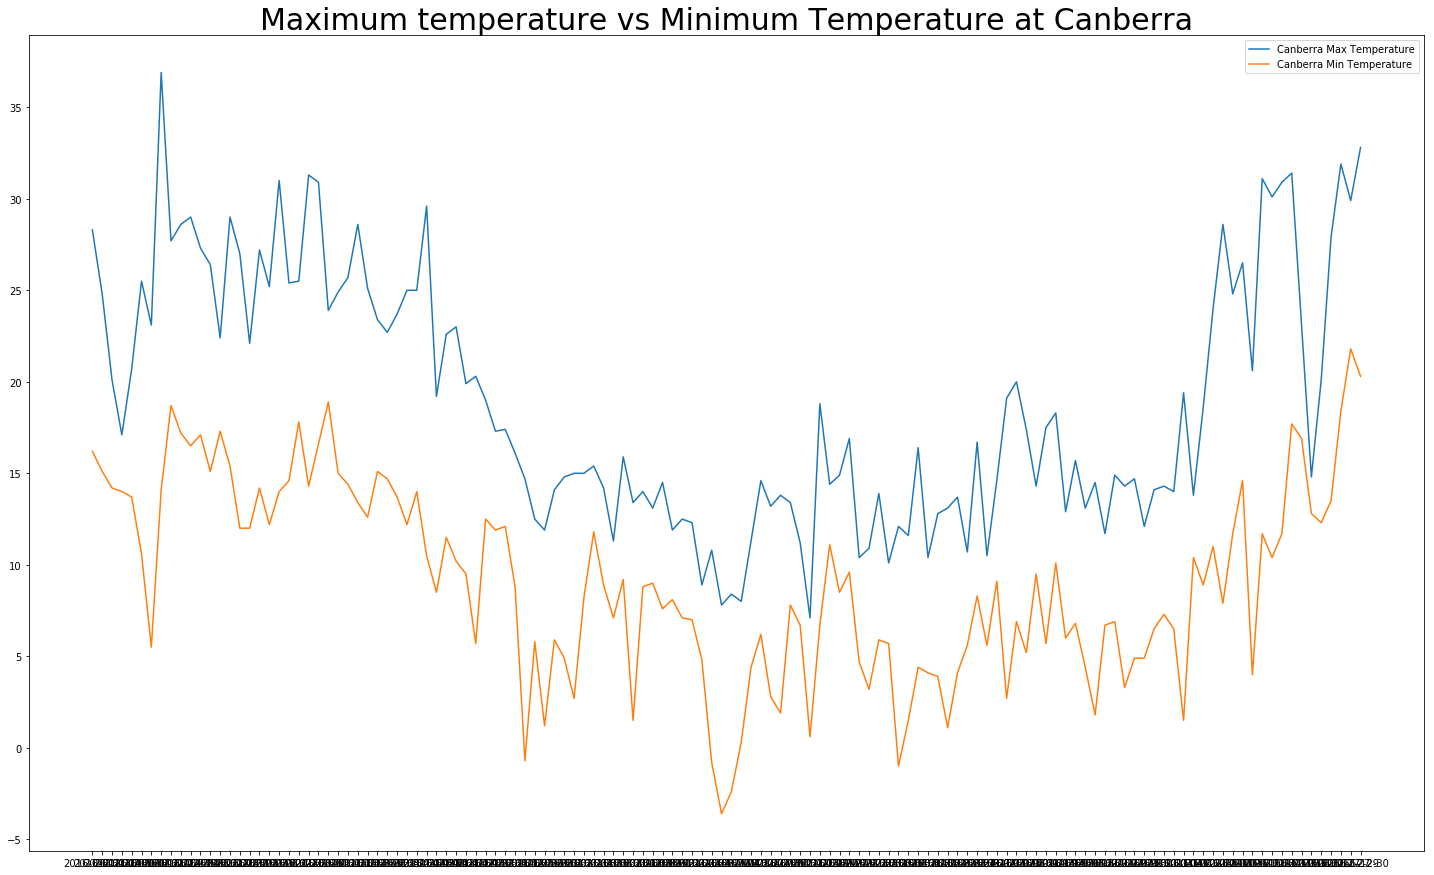

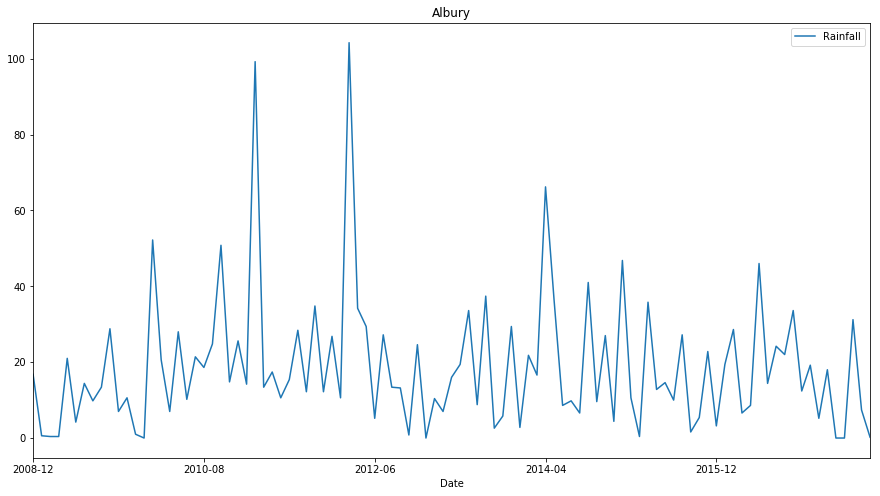

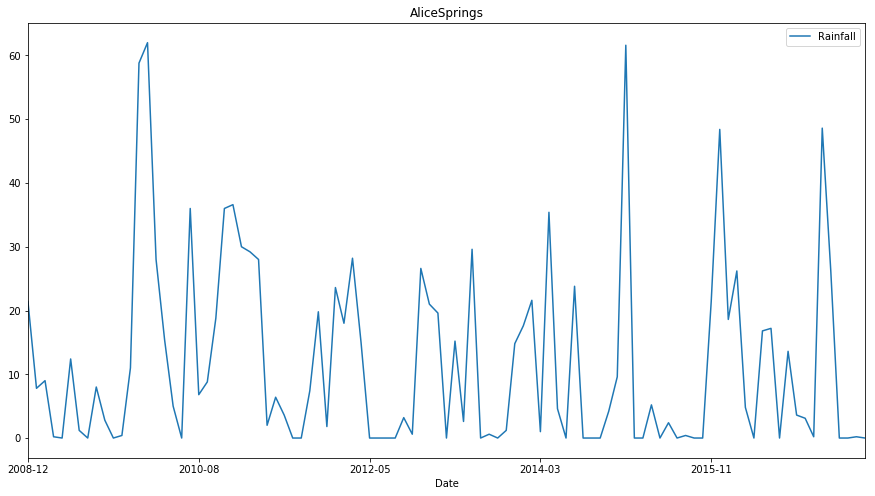

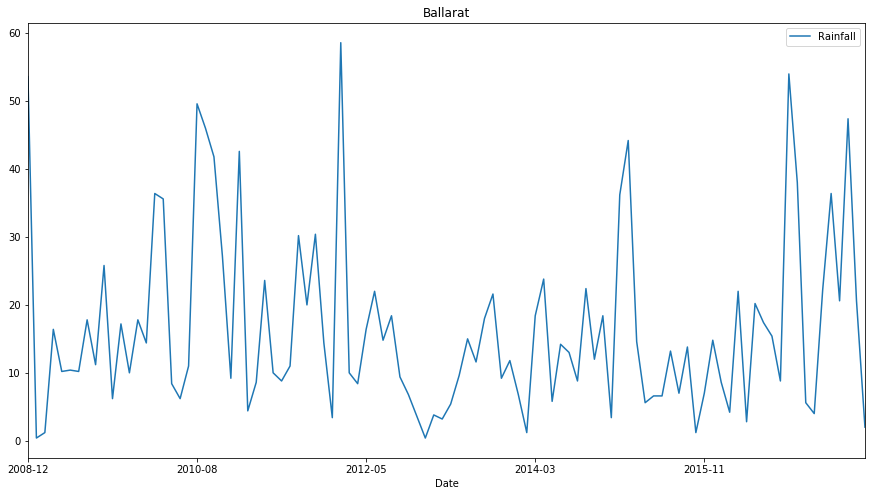

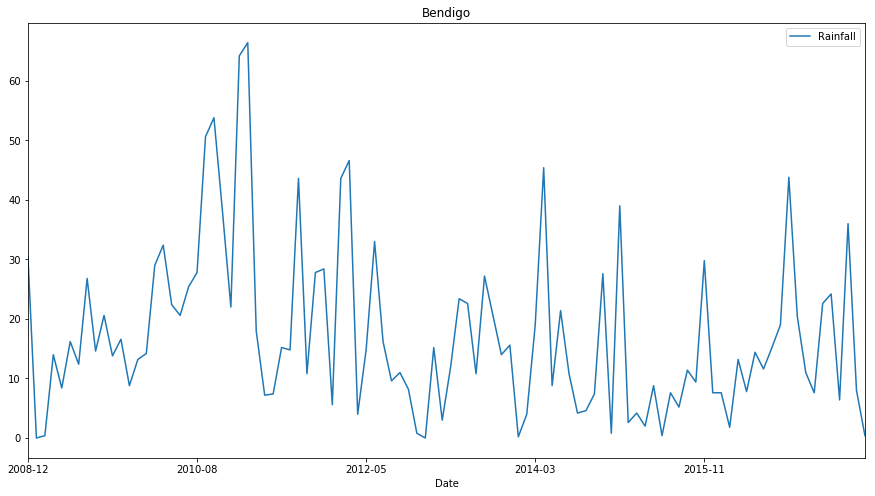

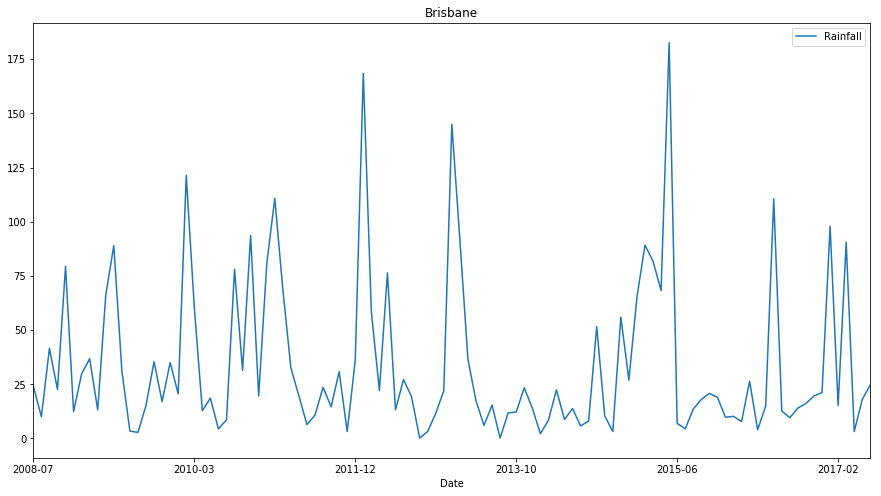

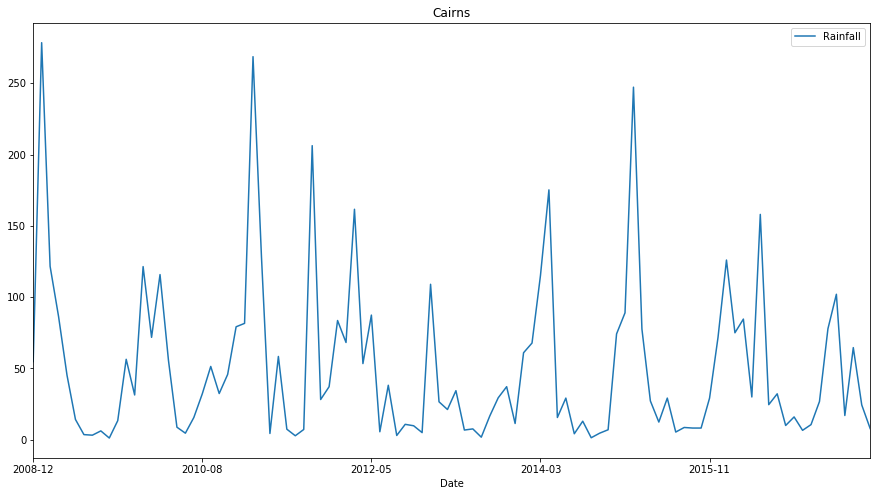

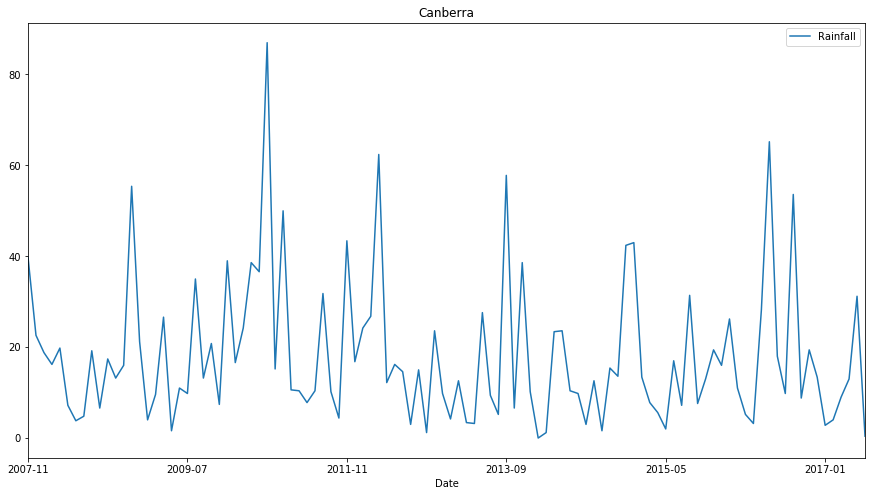

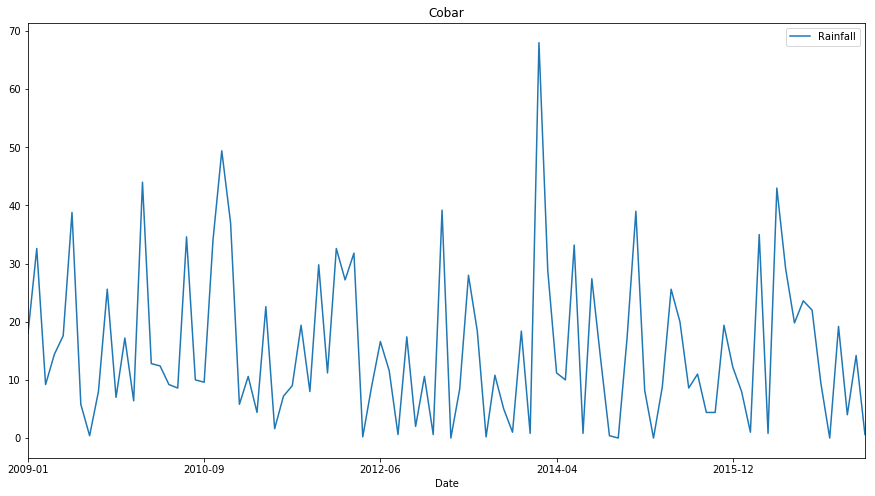

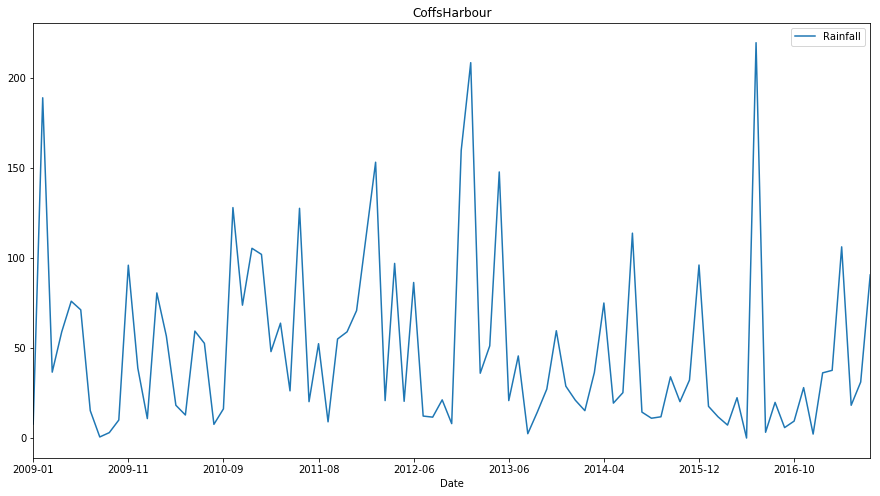

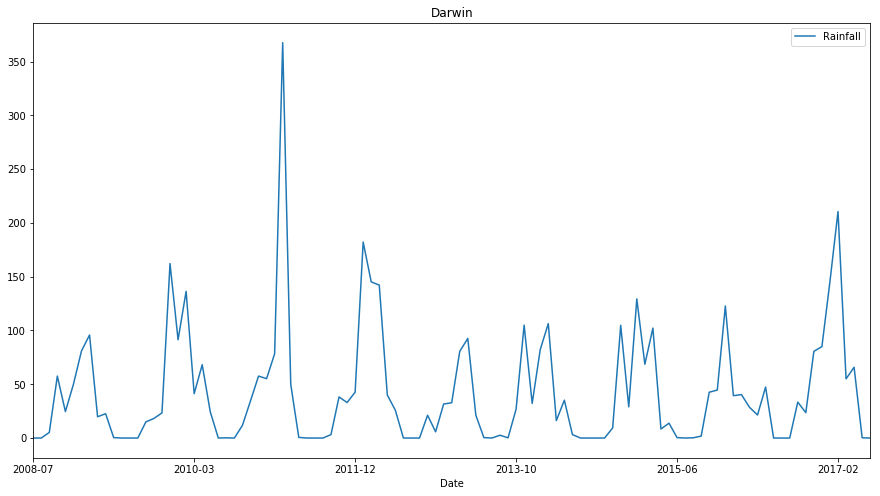

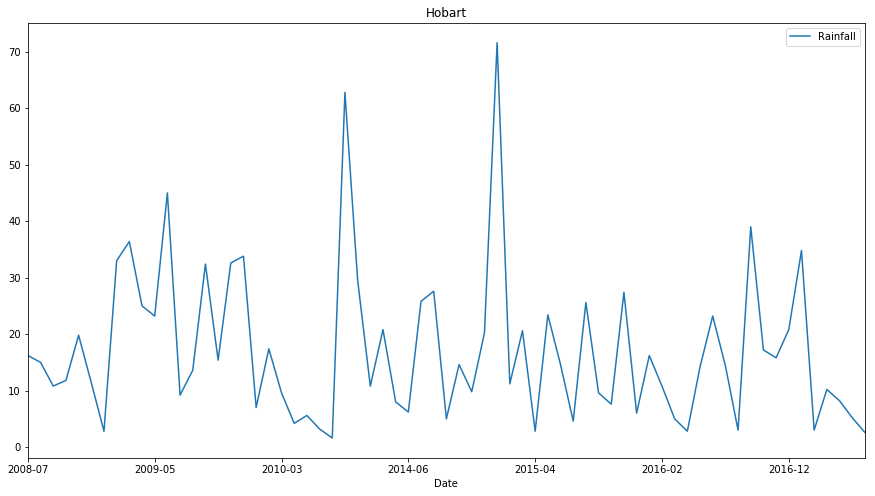

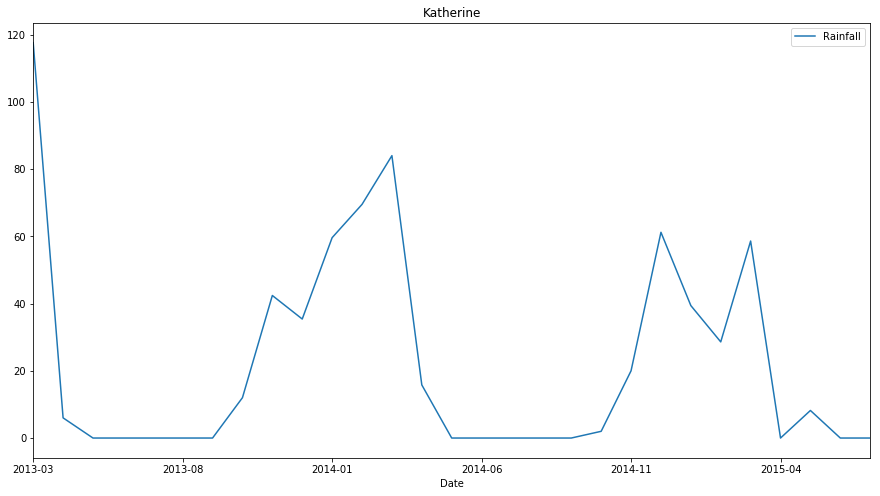

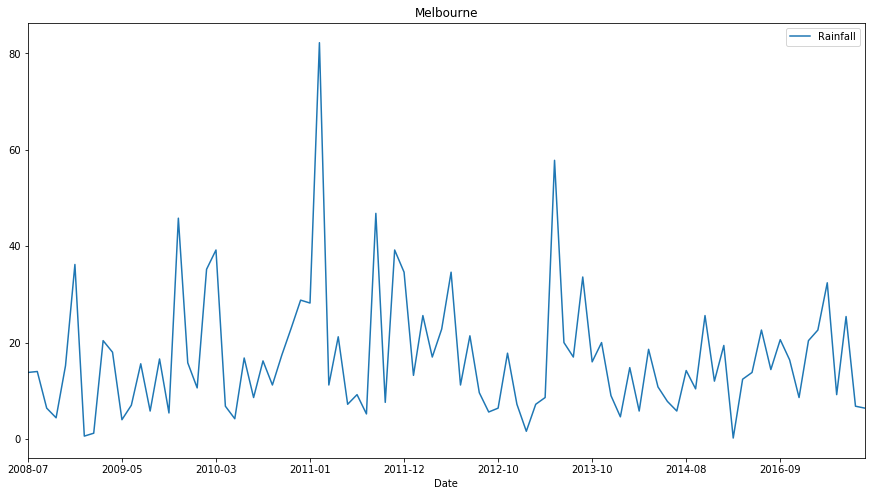

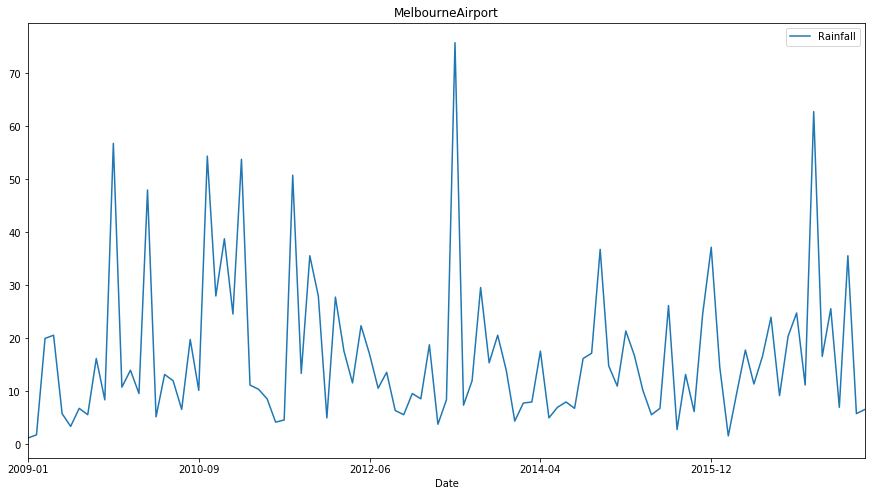

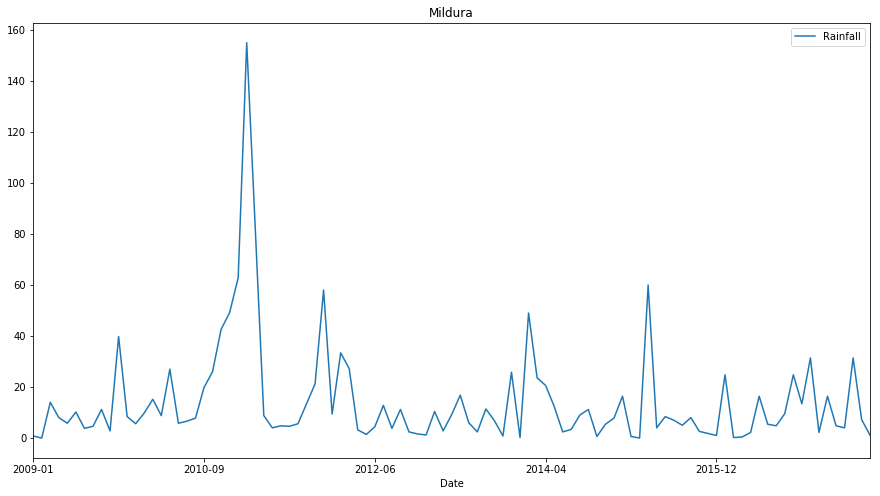

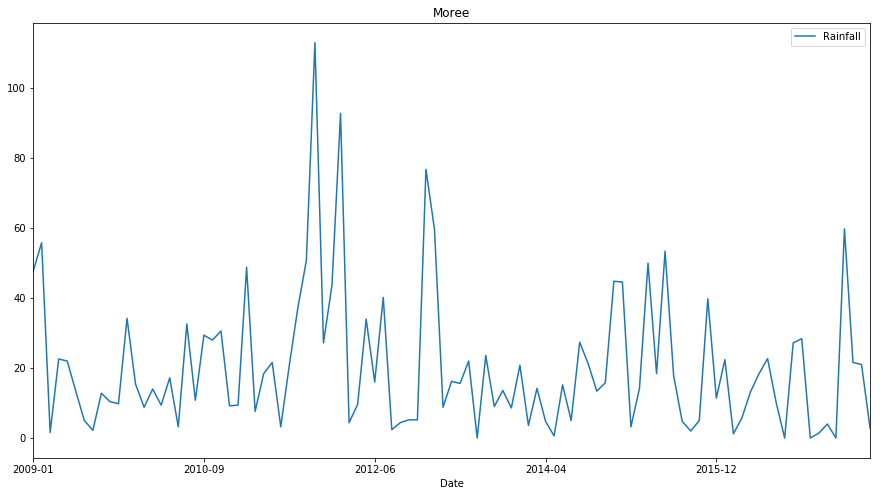

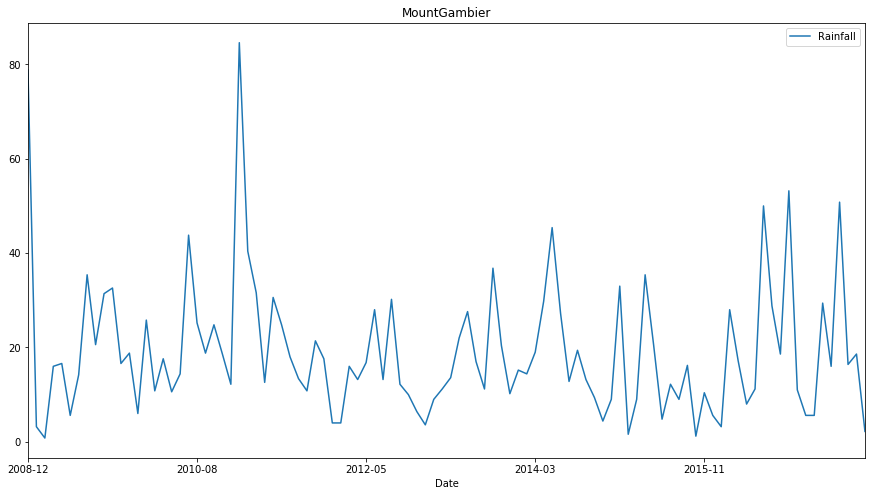

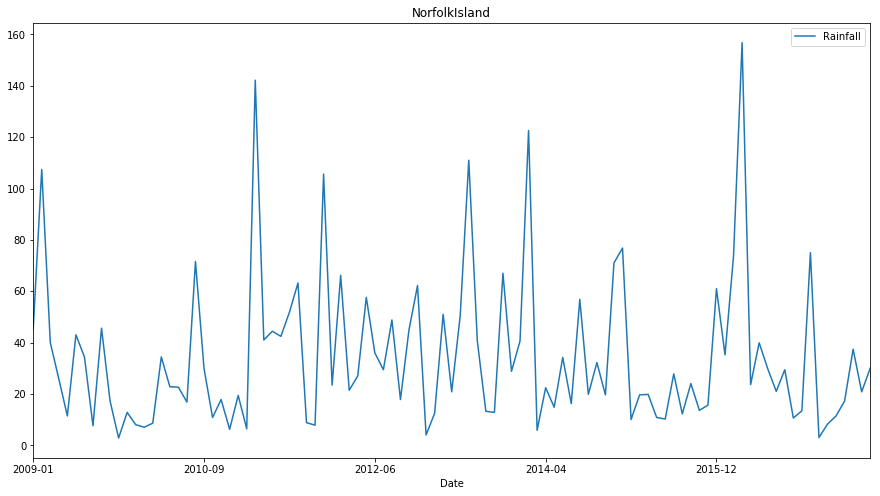

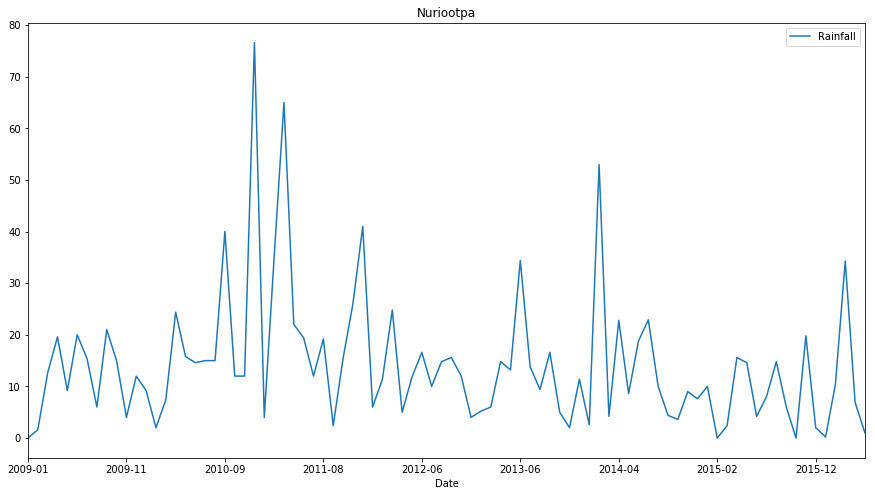

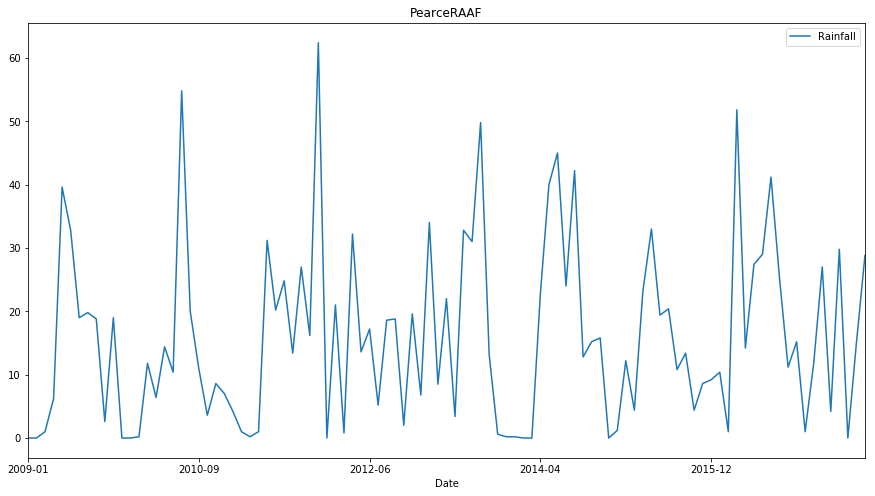

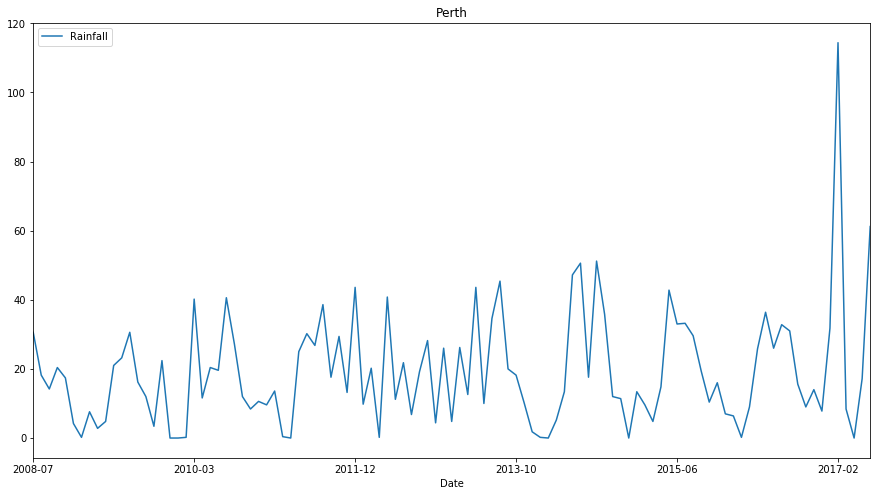

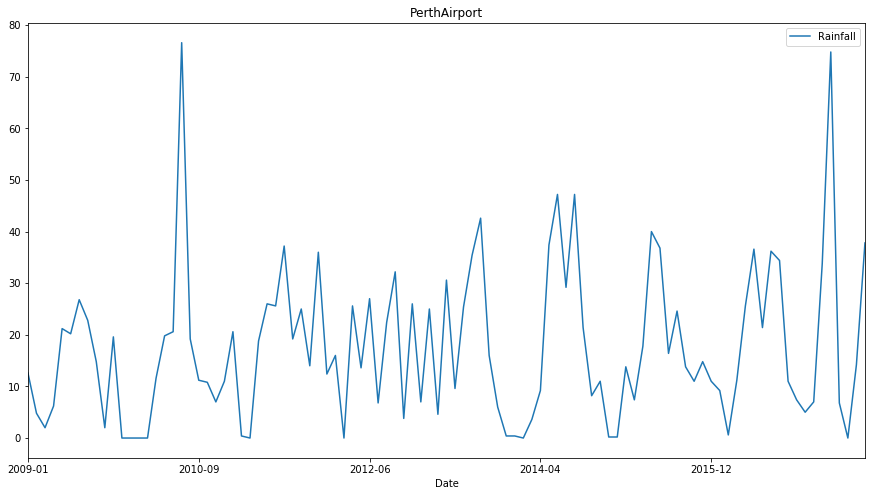

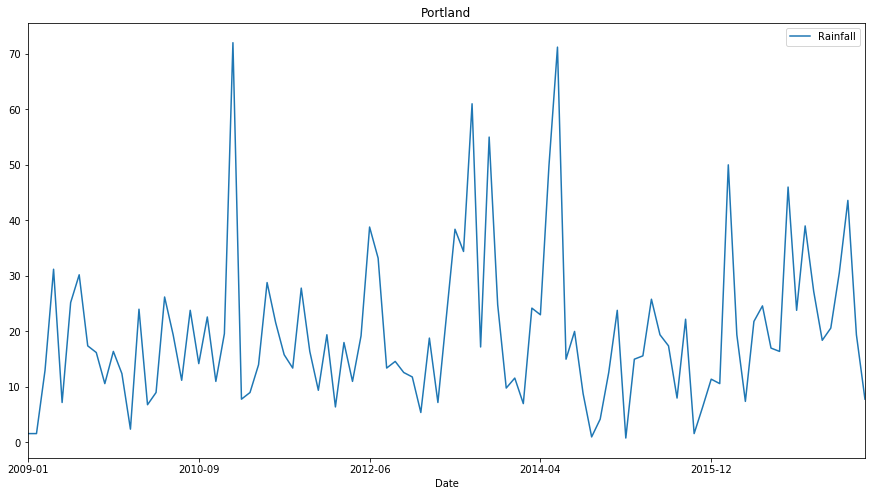

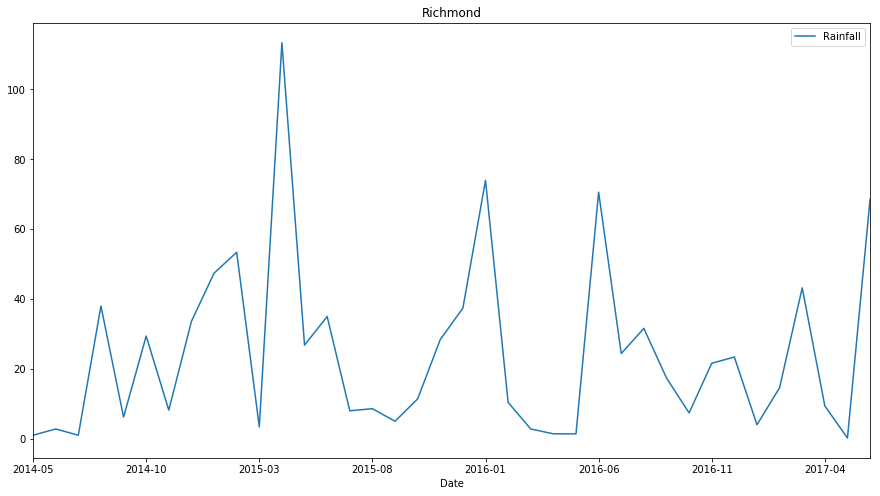

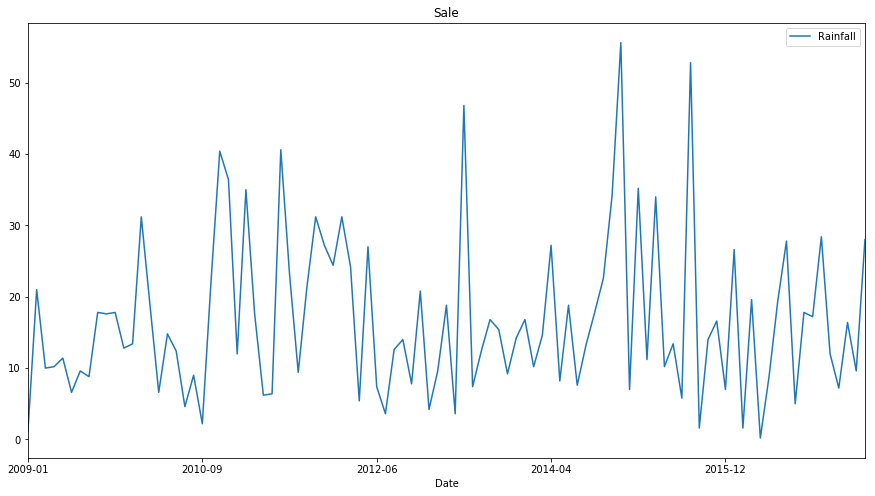

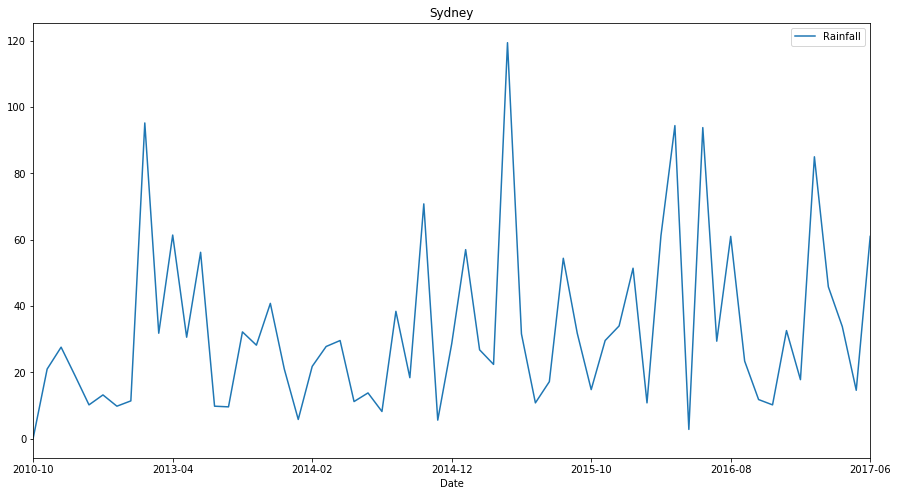

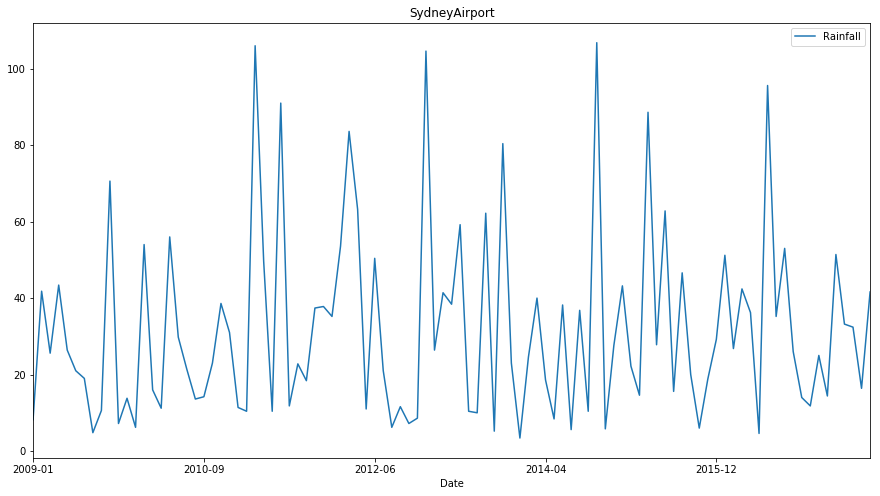

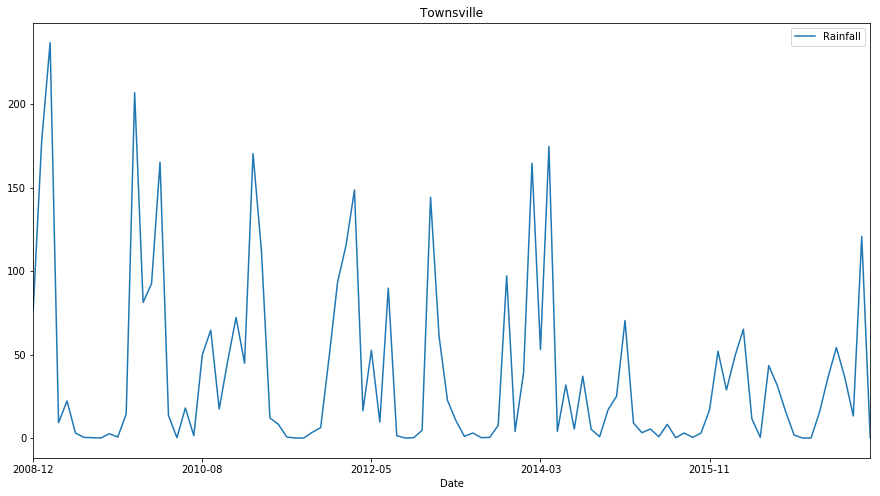

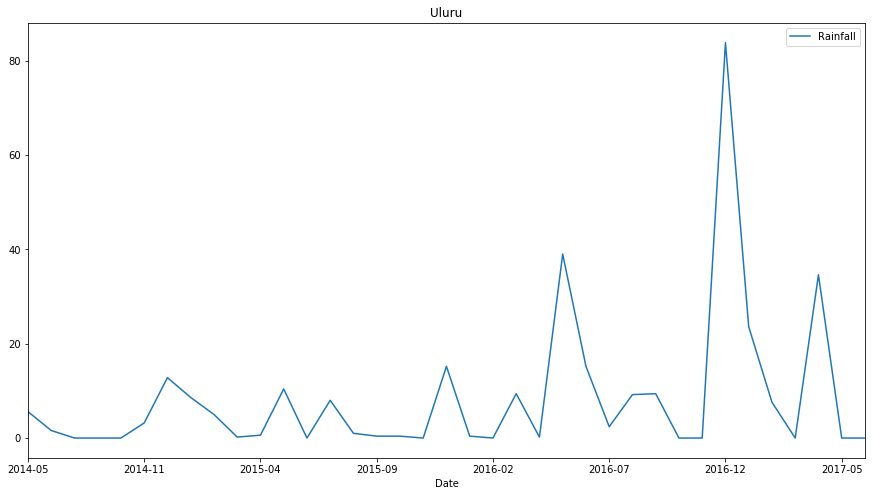

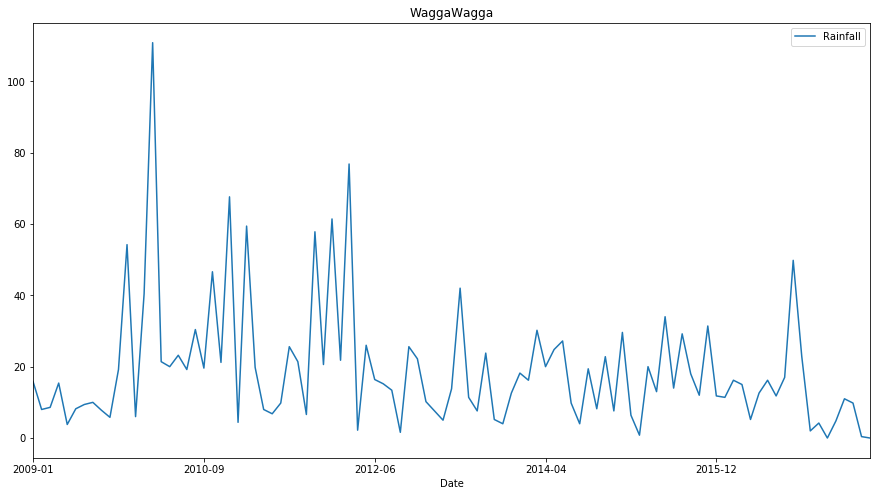

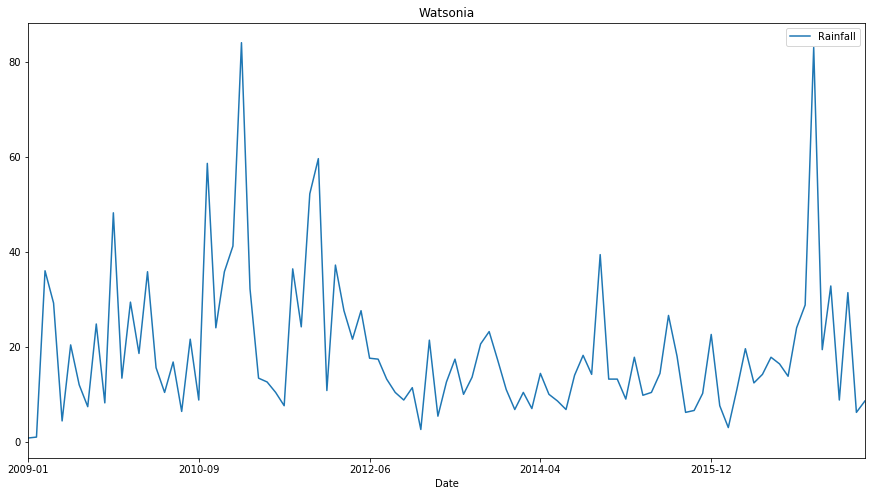

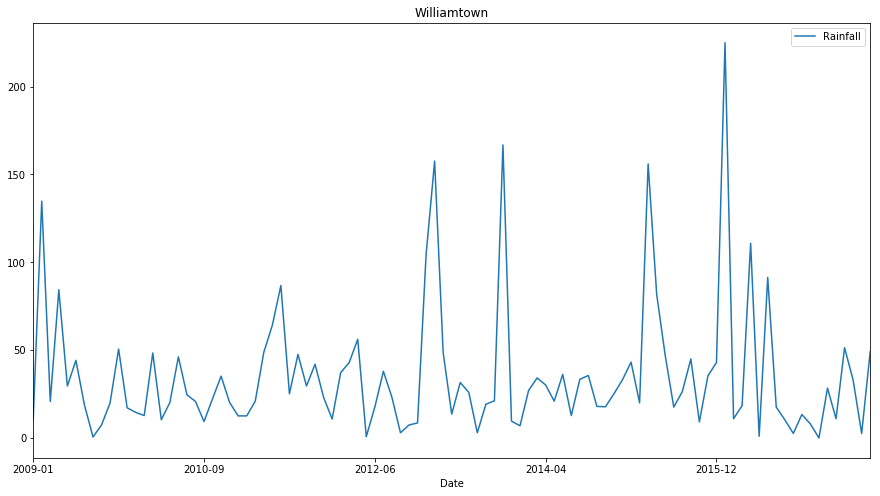

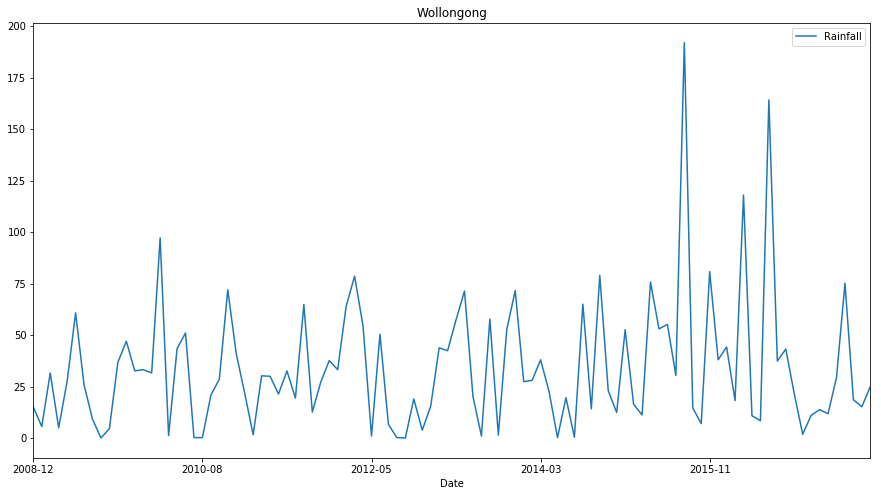

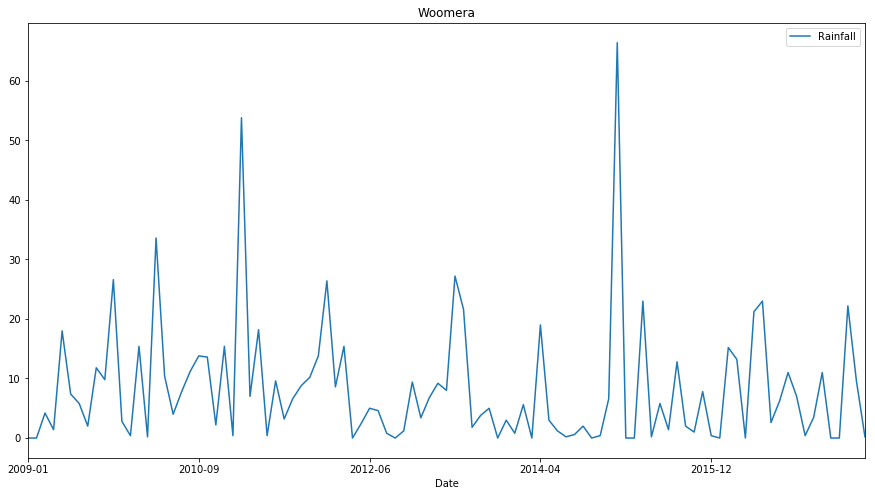

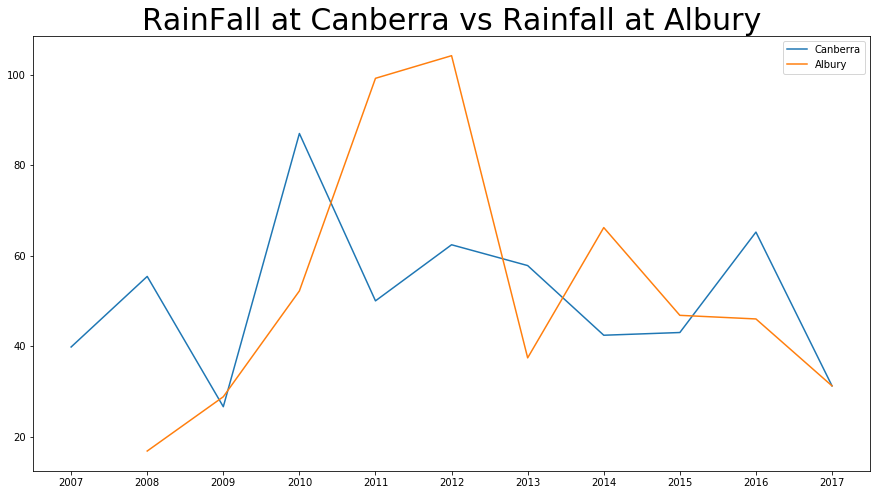

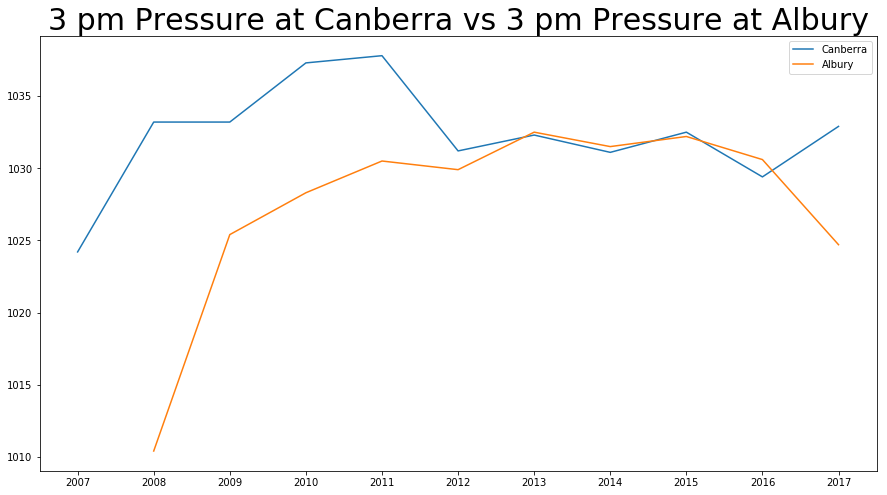

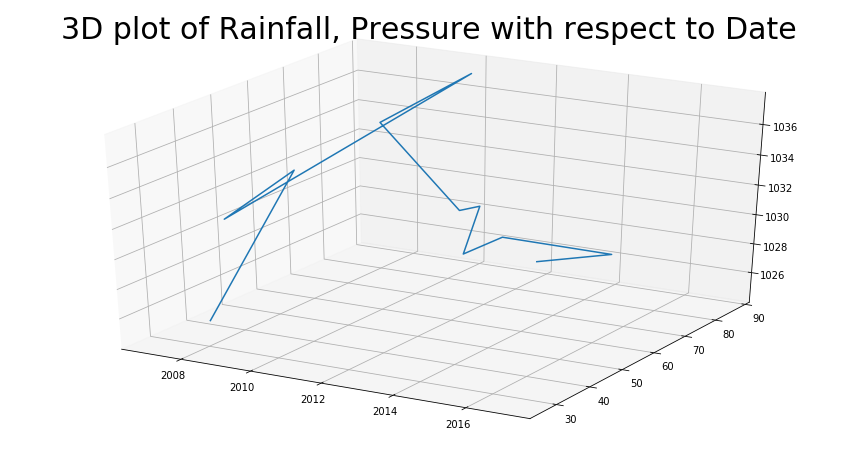

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d


df = pd.read_csv("ausweather_preprocessed.csv",sep="\t")


location_grouped_means = df.groupby('Location').mean()
location_grouped_max = df.groupby('Location').max()
location_grouped_min = df.groupby('Location').min()
grouped_by_month_rainfall = df.groupby([df.Date.str[:7],"Location"])["Location","Rainfall"].max().reset_index()

grouped_by_year_rainfall = df.groupby([df.Date.str[:4],"Location"])["Location","Rainfall"].max().reset_index()
grouped_by_year_rainfall_pressure = df.groupby([df.Date.str[:4],"Location"])["Location","Rainfall","Pressure3pm"].max().reset_index()

grouped_by_month_pressure = df.groupby([df.Date.str[:4],"Location"])["Location","Pressure3pm"].max().reset_index()

df1 = grouped_by_year_rainfall.groupby(["Location","Date"]).max().reset_index()
df2 = grouped_by_month_rainfall.groupby(["Location","Date"]).max().reset_index()
df3 = grouped_by_month_pressure.groupby(["Location","Date"]).max().reset_index()
df4 = grouped_by_year_rainfall_pressure.groupby(["Location","Date"]).max().reset_index()

plt.figure(figsize=(25,15))


for title, group in df2.groupby('Location'):
    group.plot(x='Date', y='Rainfall', title=title,figsize=(15,8))


x_values = df1[df1["Location"]=="Albury"]
y_values = df1[df1["Location"]=="Canberra"]

pressure_x_values = df3[df3["Location"]=="Albury"]
pressure_y_values = df3[df3["Location"]=="Canberra"]

fully_values = df4[df4["Location"]=="Canberra"]

plt.figure(figsize=(15,8))
plt.title("RainFall at Canberra vs Rainfall at Albury",fontsize=30)

plt.plot(y_values["Date"],y_values["Rainfall"],label="Canberra")
plt.plot(x_values["Date"],x_values["Rainfall"],label="Albury")
plt.legend()
fig1 = plt.figure(1,figsize=(15,8))
ax1 = fig1.gca()

plt.title("Maximum temperature vs Minimum Temperature at Canberra",fontsize=30)
plt.plot(df[df["Location"]=="Canberra"][df["Date"].str[:4]=="2016"]["Date"],df[df["Location"]=="Canberra"][df["Date"].str[:4]=="2016"]["MaxTemp"],label="Canberra Max Temperature")
plt.plot(df[df["Location"]=="Canberra"][df["Date"].str[:4]=="2016"]["Date"],df[df["Location"]=="Canberra"][df["Date"].str[:4]=="2016"]["MinTemp"],label="Canberra Min Temperature")
plt.legend()
plt.figure(figsize=(15,8))
plt.title("3 pm Pressure at Canberra vs 3 pm Pressure at Albury",fontsize=30)
plt.plot(pressure_y_values["Date"],pressure_y_values["Pressure3pm"],label="Canberra")
plt.plot(pressure_x_values["Date"],pressure_x_values["Pressure3pm"],label="Albury")
plt.legend()
plt.show()
plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')

years = np.array(np.asarray(fully_values["Date"])).astype(np.float)
plt.title("3D plot of Rainfall, Pressure with respect to Date",fontsize=30)
ax.plot(years,np.asarray(fully_values["Rainfall"]),np.asarray(fully_values["Pressure3pm"]), label='parametric curve')

here


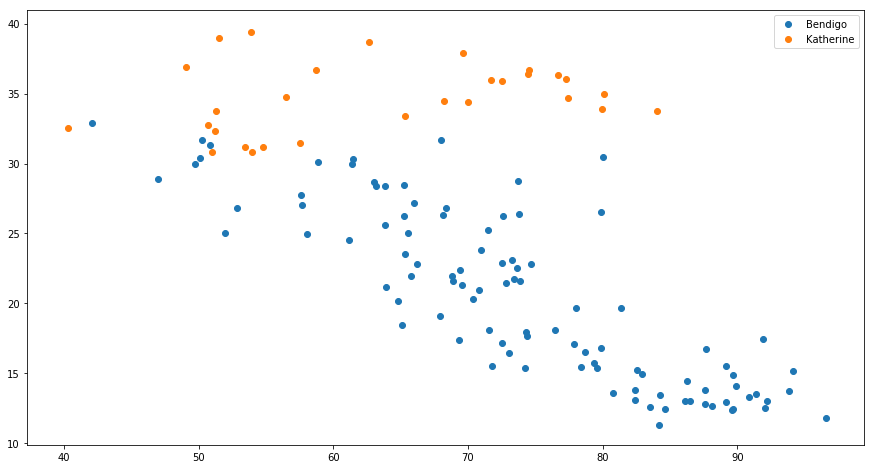

<Figure size 1080x576 with 0 Axes>

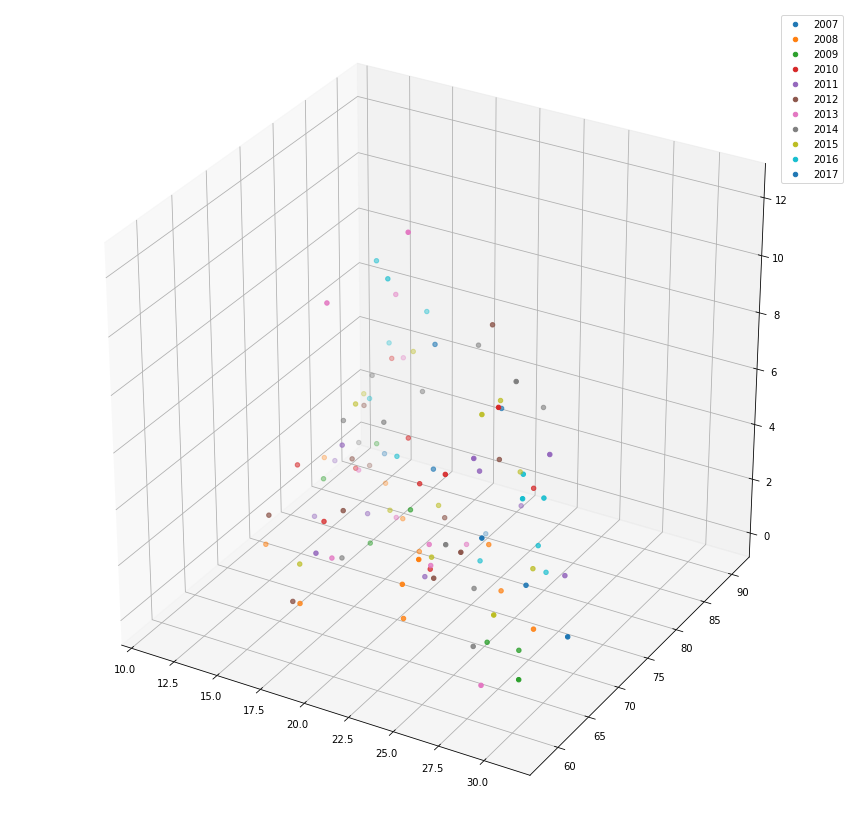

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

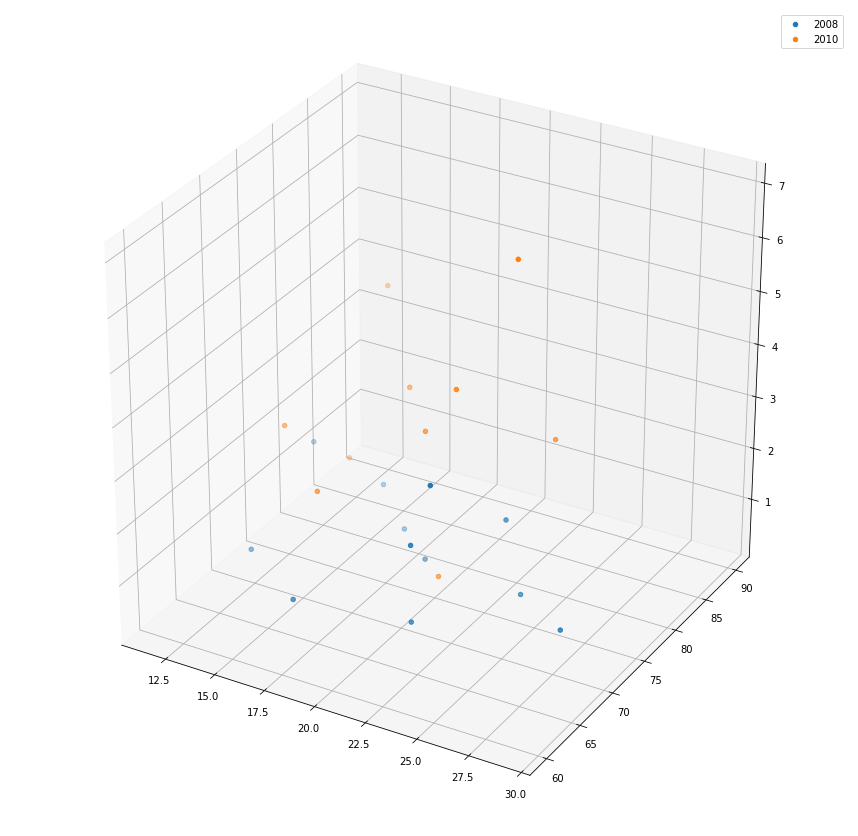

<Figure size 1080x576 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d


df = pd.read_csv("ausweather_preprocessed.csv",sep="\t")

grouped_by_month_rainfall = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am"].mean().reset_index()

#print grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall[ (grouped_2013["Location"]=="Katherine")  | (grouped_2013["Location"]=="Bendigo") ]

#print grouped_2013



plt.figure(figsize=(15,8))
#EXAMPLE OF A SIMPLE TWO DIVISION CLUSTER. DATA FROM EITHER ONE OF THE SOURCES CAN BE CLASSIFIED TO EITHER ONE BASED ON SOME CLASSIFICATION ALGORITHM
for name,group in grouped_2013.groupby("Location"):
    plt.scatter(group["Humidity9am"],group["MaxTemp"],label=name)
    plt.legend()
 

print "here"
grouped3d = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am","Rainfall"].mean().reset_index()

grouped3d = grouped3d[grouped3d["Location"]=="Canberra"]

#print grouped3d
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()

    
grouped3d = grouped3d[grouped3d["Location"]=="Canberra"].reset_index()

grouped3d =  grouped3d[(grouped3d["Date"].str[:4] == "2010") | (grouped3d["Date"].str[:4] == "2008")]

#DATA HERE CAN BE CLASSIFIED BETWEEN 2008 and 2010

#print grouped3d
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()

plt.show()

